In [1]:
import numpy as np
import pandas as pd

In [2]:
uploaded = pd.read_csv('Bev Base Dearation Data Extract .csv')
# Dataset is now stored in a Pandas Dataframe

In [3]:
uploaded.head()

,SKU,SKU_DESCRIPTION,BATCHID,Recipe,Tank,Unit,Instruction_Step,Source,Material_ID,Material_Name,...,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Batch_Phase_Type,Deaeration Phase
0,1002150,BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B,107643491,10166969:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...,U_25,U_25MT03,S3_BATCH_IN_PROGRESS,TANK_STATUS,NaN,NaN,...,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,Batch start up,0
1,1002150,BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B,107643491,10166969:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...,U_25,U_25MT03,STEP1_CONS,CONS,1002565,WATER TREATED,...,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,Treated water bulk addition,0
2,1002150,BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B,107643491,10166969:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...,U_25,U_25MT03,PLEASE VERIFY BULK ADDITION,PROMPT,NaN,NaN,...,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,Prompt,0
3,1002150,BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B,107643491,10166969:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...,U_25,U_25MT03,STEP1_CONS,CONS,1037802,S813 SOD BENZOATE XFX25,...,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,Manadd addition,0
4,1002150,BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B,107643491,10166969:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...,U_25,U_25MT03,STEP1_CONS,CONS,1002818,S651 CITRIC ACID ANH BG XFX25,...,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,Manadd addition,0


In [4]:
# Or rename the existing DataFrame (rather than creating a copy)
uploaded.rename(columns={'SKU': 'Material','Deaeration Phase':'Deaeration_Phase'}, inplace=True)

In [5]:
uploaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9487 entries, 0 to 9486
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Material               9487 non-null   int64  
 1   SKU_DESCRIPTION        9487 non-null   object 
 2   BATCHID                9487 non-null   int64  
 3   Recipe                 9487 non-null   object 
 4   Tank                   9487 non-null   object 
 5   Unit                   9487 non-null   object 
 6   Instruction_Step       9462 non-null   object 
 7   Source                 9487 non-null   object 
 8   Material_ID            2443 non-null   object 
 9   Material_Name          1980 non-null   object 
 10  Quantity               9487 non-null   float64
 11  Phase_start            9487 non-null   object 
 12  Phase_end              9487 non-null   object 
 13  Phase_duration         9487 non-null   int64  
 14  Phase_start_delay      9487 non-null   int64  
 15  Phas

In [6]:
#uploaded.describe().T

In [75]:
#How can we get a summary of categorical data? The value_counts() method will be useful in this case.
#Material=uploaded.Material.value_counts()
#Material

# Investigation of the Deaeration data  

In [8]:
# Determine how many materials have a deaeration phases
DeaerationPhase =uploaded.Deaeration_Phase.value_counts()
DeaerationPhase

0    9204
1     283
Name: Deaeration_Phase, dtype: int64

In [76]:
# Determine how many times a beverage material was produced 
#SKU_DESCRIPTION	=uploaded.SKU_DESCRIPTION	.value_counts()
#SKU_DESCRIPTION

In [10]:
#Select all the rows where the material is in the list below
Deaeration_Phase = [1]
df_filtered = uploaded[uploaded['Deaeration_Phase'].isin(Deaeration_Phase)]
print(df_filtered)

      Material                           SKU_DESCRIPTION    BATCHID  \
33     1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107762133   
60     1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107829859   
87     1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107916883   
114    1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107996308   
141    1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  108067054   
...        ...                                       ...        ...   
9361   3044756                         BCH LE/B-12.00 P2  107916904   
9388   3044756                         BCH LE/B-12.00 P2  107926393   
9415   3044756                         BCH LE/B-12.00 P2  107940278   
9442   3044756                         BCH LE/B-12.00 P2  108041496   
9470   3055706                      BCH LE/A/B-809.00 P2  107737576   

                                                 Recipe  Tank      Unit  \
33    10169557:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...  U_25  U_25MT03 

In [11]:
# Filter the df vy the most commonly produced material 1775253 in terms of the deaeration phase
df_filtered1 = df_filtered[(df_filtered['Material'] == 1775253)]
print(df_filtered1)

      Material      SKU_DESCRIPTION    BATCHID  \
6406   1775253  BCH OR/B-1580.00 P2  107618350   
6436   1775253  BCH OR/B-1580.00 P2  107618351   
6465   1775253  BCH OR/B-1580.00 P2  107650387   
6497   1775253  BCH OR/B-1580.00 P2  107650388   
6529   1775253  BCH OR/B-1580.00 P2  107659907   
6560   1775253  BCH OR/B-1580.00 P2  107659908   
6620   1775253  BCH OR/B-1580.00 P2  107710853   
6650   1775253  BCH OR/B-1580.00 P2  107734577   
6681   1775253  BCH OR/B-1580.00 P2  107734582   
6712   1775253  BCH OR/B-1580.00 P2  107734590   
6743   1775253  BCH OR/B-1580.00 P2  107749891   
6773   1775253  BCH OR/B-1580.00 P2  107749892   
6804   1775253  BCH OR/B-1580.00 P2  107755257   
6835   1775253  BCH OR/B-1580.00 P2  107771597   
6865   1775253  BCH OR/B-1580.00 P2  107771598   
6896   1775253  BCH OR/B-1580.00 P2  107781794   
6927   1775253  BCH OR/B-1580.00 P2  107781795   
6958   1775253  BCH OR/B-1580.00 P2  107790571   
6988   1775253  BCH OR/B-1580.00 P2  107790572   


In [77]:
# Determines the number of tank units used to produce the 52 batches of the material over a time period
Unit=df_filtered1. Unit.value_counts()
Unit

U_23MT04    12
U_23MT05    11
U_23MT02     8
U_23MT01     7
U_22MT02     5
U_22MT04     5
U_22MT03     4
Name: Unit, dtype: int64

In [81]:
#import pandas as pd

# Assuming df_filtered1 DataFrames are defined

# Create a new column 'QuantityRange' in df_filtered1 based on the 'Quantity' values of the deaeration phases , this is not the total quantity of the batch
#df_filtered1['QuantityRange'] = pd.cut(df_filtered1['Quantity'], bins=2, labels=['QuantityRange <= 1000', 'QuantityRange >= 1200'])

#print(df_filtered1)

In [82]:
df_filtered1.describe()

,Material,BATCHID,Quantity,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration_Phase
count,52.0,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.0
mean,1775253.0,1.078715e+08,1082.443423,44.807692,3196.596154,13.269231,68.835633,7.901600e+01,13.596154,33.653846,1.0
std,0.0,1.389786e+05,386.376422,68.704550,937.041679,1.522580,63.748134,4.304850e-14,5.210320,67.691018,0.0
min,1775253.0,1.076184e+08,814.000000,5.000000,886.000000,7.000000,3.355100,7.901600e+01,10.000000,0.000000,1.0
25%,1775253.0,1.077675e+08,815.600000,12.000000,2553.750000,12.000000,23.104525,7.901600e+01,10.000000,0.000000,1.0
50%,1775253.0,1.078667e+08,816.050000,17.000000,3293.500000,14.000000,49.486350,7.901600e+01,10.000000,6.500000,1.0
75%,1775253.0,1.079835e+08,1631.200000,52.000000,3760.500000,14.000000,97.464675,7.901600e+01,21.000000,38.750000,1.0
max,1775253.0,1.080847e+08,1632.200000,373.000000,5376.000000,14.000000,326.420000,7.901600e+01,21.000000,352.000000,1.0


Box plots

Another way of analyzing numerical data would be to use box plots. Box plot shows us the median of the data, which represents where the middle data point is. The upper and lower quartiles represent the 75 and 25 percentile of the data respectively. The upper and lower extremes shows us the extreme ends of the distribution of our data. Finally, it also represents outliers, which occur outside the upper and lower extremes.

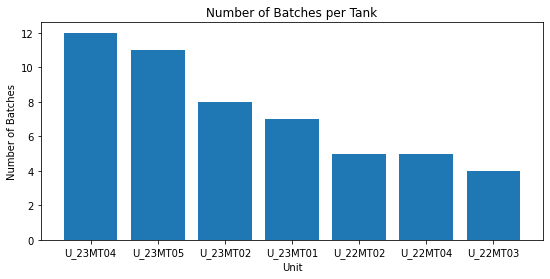

In [85]:
# Count the number of batches per tank
batch_counts = df_filtered1['Unit'].value_counts()

# Plot the bar chart
plt.figure(figsize = (9,4))
plt.bar(batch_counts.index, batch_counts.values)
plt.xlabel('Unit')
plt.ylabel('Number of Batches')
plt.title('Number of Batches per Tank')
plt.show()

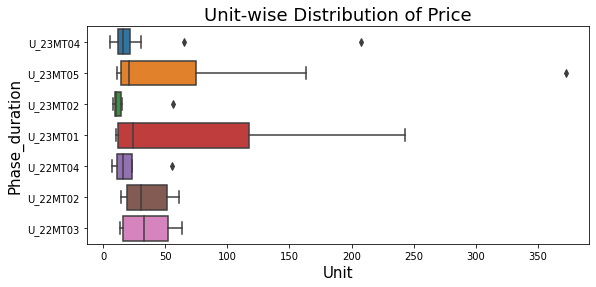

In [88]:
plt.figure(figsize = (9,4))
sns.boxplot(data =df_filtered1,x = 'Phase_duration',y ="Unit")
plt.title("Unit-wise Distribution of Price", fontsize = 18)
plt.ylabel("Phase_duration", fontsize = 15)
plt.xlabel("Unit",fontsize = 15)
plt.show()

In [12]:
#pip install matplotlib 

In [ ]:
#Determine any correlations between the variables in the df above 

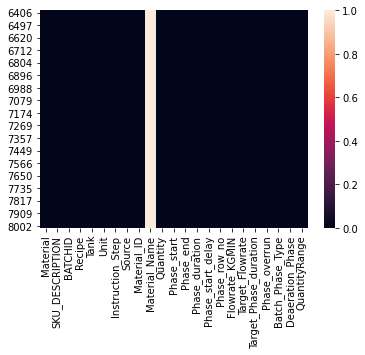

In [90]:
sns.heatmap(df_filtered1.isnull())
plt.show()

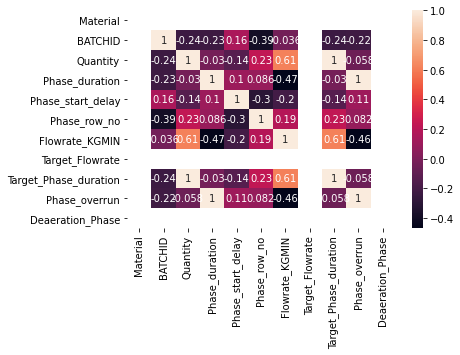

In [91]:
correlation_matrix = df_filtered1.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


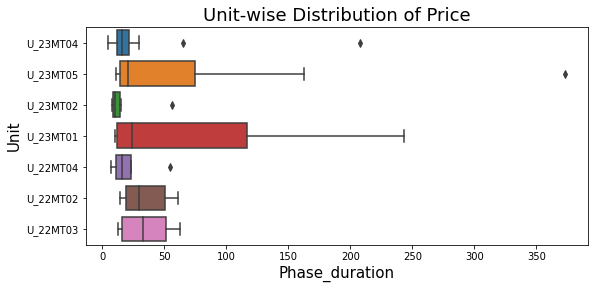

In [14]:
plt.figure(figsize = (9,4))
sns.boxplot(data =df_filtered1,x = 'Phase_duration',y ="Unit")
plt.title("Unit-wise Distribution of Price", fontsize = 18)
plt.ylabel("Unit", fontsize = 15)
plt.xlabel("Phase_duration",fontsize = 15)
plt.show()

<Axes: title={'center': 'Fiction vs Non Fiction'}, xlabel='Unit', ylabel='count'>

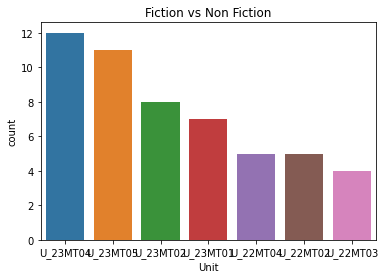

In [15]:
plt.title('Fiction vs Non Fiction')
sns.countplot(x='Unit', data=df_filtered1)

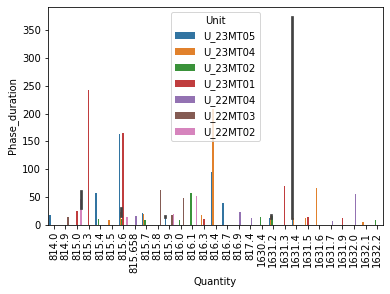

In [16]:
bestseller_books_price = df_filtered1.sort_values("Unit", ascending= False)
plt.xticks(rotation = 90)
sns.barplot(x = 'Quantity',
            y = 'Phase_duration',
            data = bestseller_books_price, hue = "Unit");

In [17]:
Unit=df_filtered1. Unit.value_counts()
Unit

U_23MT04    12
U_23MT05    11
U_23MT02     8
U_23MT01     7
U_22MT02     5
U_22MT04     5
U_22MT03     4
Name: Unit, dtype: int64

In [47]:
columns_list= df_filtered1.columns.tolist()
print(columns_list)

['Material', 'SKU_DESCRIPTION', 'BATCHID', 'Recipe', 'Tank', 'Unit', 'Instruction_Step', 'Source', 'Material_ID', 'Material_Name', 'Quantity', 'Phase_start', 'Phase_end', 'Phase_duration', 'Phase_start_delay', 'Phase_row_no', 'Flowrate_KGMIN', 'Target_Flowrate', 'Target_Phase_duration', 'Phase_overrun', 'Batch_Phase_Type', 'Deaeration_Phase']


# one hot encoding 
We need to convert the tank ids into categorical dummy variables using one-hot encoding. This will create a binary column for each tank id 

In [72]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for Tank_ID
encoder = OneHotEncoder()
tank_ids_encoded = encoder.fit_transform(df_filtered1[['Unit']])

In [73]:
# Convert the encoded sparse matrix to a dense array
tank_ids_encoded = tank_ids_encoded.toarray()

In [62]:
data_encoded.drop(columns=['Material','SKU_DESCRIPTION','BATCHID','Recipe','Tank','Instruction_Step','Source','Material_ID','Material_Name','Quantity','Phase_start','Phase_end','Phase_start_delay','Phase_row_no','Flowrate_KGMIN','Target_Flowrate','Target_Phase_duration','Phase_overrun','Batch_Phase_Type','Deaeration_Phase'], inplace=True)

In [63]:
#Split features and target
X=data_encoded.drop(['Phase_duration'], axis=1)
y=data_encoded["Phase_duration"]

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
# Define features and target variable
#features = ['Phase_duration'] # replace with your actual feature columns
#target = 'Unit'

In [65]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [66]:
# Initialize model
model = LinearRegression()


In [67]:
# Fit model to training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 48.567847212207


In [68]:
# Visualization
plt.scatter(data_encoded['Unit'], data_encoded['Phase_duration'], label='Actual Phase Duration Times')
plt.plot(data_encoded['Unit'], predictions, color='red', label='Predicted Phase Duration Times')
plt.xlabel('Unit')
plt.ylabel('Phase Duration Times')
plt.legend()
plt.title('Linear Regression: Tank Capacity vs. Phase Duration Times')
plt.show()

KeyError: 'Unit'